In [79]:
from dasQt.das import DAS 
import pathlib
import numpy as np
import numpy as np
import scipy
import matplotlib.pyplot as plt

from dasQt.bp_filter import bp_filter
from dasQt.norm_trace1 import norm_trace
from dasQt.filter import butterworth

# %matplotlib auto
# %matplotlib notebook
# %matplotlib widget
# %matplotlib ipympl


## Load Data

In [80]:
data = []
das = DAS()

files = pathlib.Path('/Users/zhiyuzhang/MyProjects/DASDataShow/car/data/').glob('*.dat')

for file in sorted(files):
    das.readData(file)
    data.append(das.data)

data = np.array(data)
print(data.shape)

dx = das.dx
dt = das.dt


(8, 60000, 104)


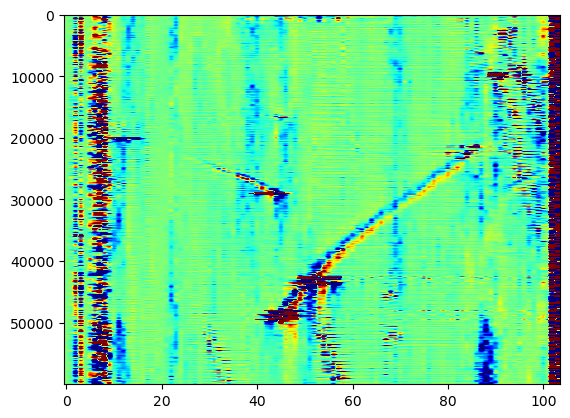

In [17]:
plt.imshow(data[0], aspect='auto', cmap='jet', vmin=-0.01, vmax=0.01)

In [36]:
t_start = 24000
t_end = 40000

car_data = data[0, t_start:t_start+5000, 80]

In [77]:
t_start = 0

car_data = data[0, t_start:t_start+5000, 80]
car_data = data[0, :, 80]

freq = np.abs(np.fft.fftfreq(car_data.shape[0], dt))
F = np.abs(np.fft.fft(car_data))

bp_data = bp_filter(car_data.reshape(car_data.shape[0], 1), dt, 0.01, 0.1, 1, 2)


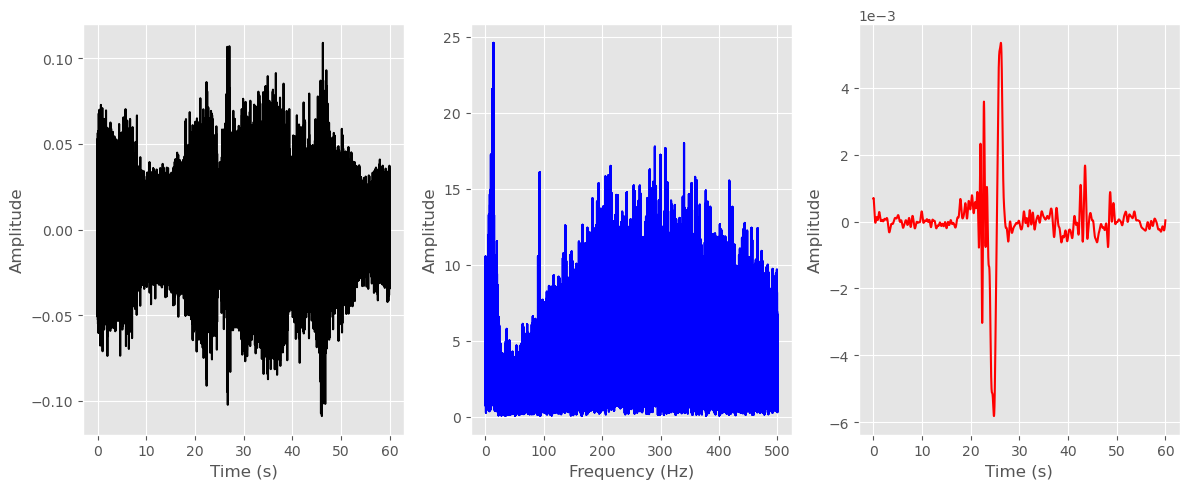

In [78]:
t = np.arange(t_start, t_start+car_data.shape[0])*dt
with plt.style.context('ggplot'):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
    ax1.plot(t, car_data, 'k')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Amplitude')
    
    ax2.plot(freq, F, 'b')
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('Amplitude')
    
    ax3.plot(t, bp_data[:, 0], 'r')
    ax3.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
    ax3.set_xlabel('Time (s)')
    ax3.set_ylabel('Amplitude')
    
    fig.tight_layout()

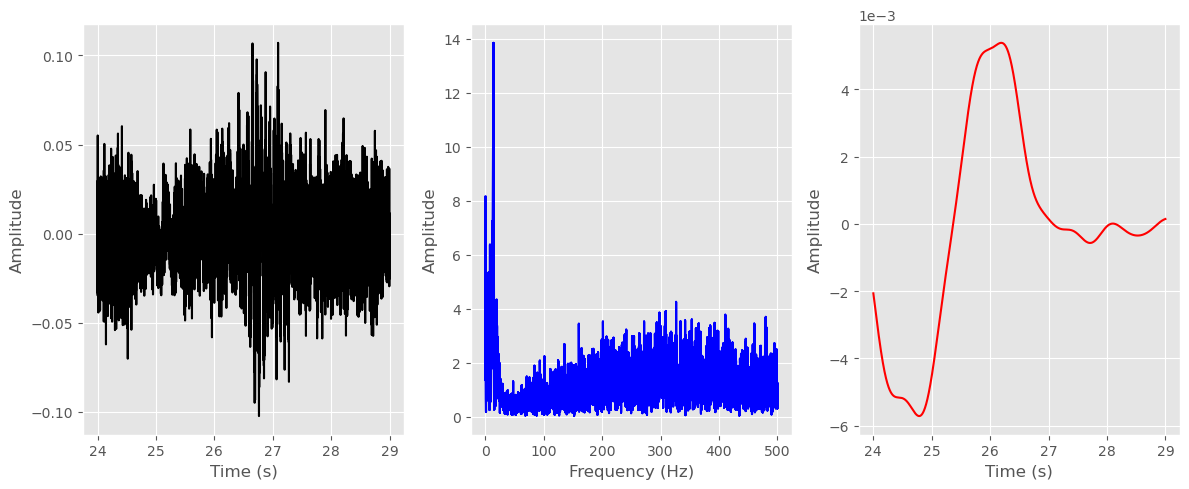

In [71]:
t = np.arange(t_start, t_start+car_data.shape[0])*dt
with plt.style.context('ggplot'):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
    ax1.plot(t, car_data, 'k')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Amplitude')
    
    ax2.plot(freq, F, 'b')
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('Amplitude')
    
    ax3.plot(t, bp_data[:, 0], 'r')
    ax3.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
    ax3.set_xlabel('Time (s)')
    ax3.set_ylabel('Amplitude')
    
    fig.tight_layout()

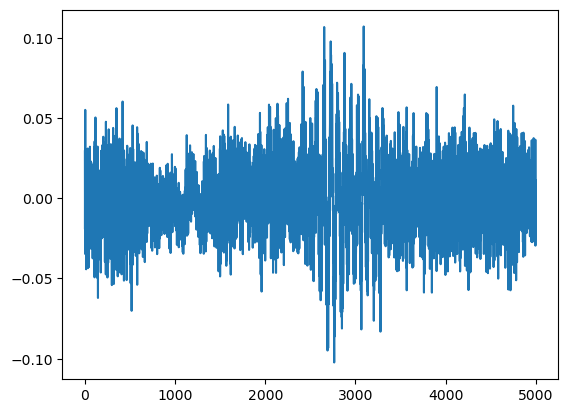

In [43]:
from scipy import signal

hb_car_data = signal.hilbert(car_data)
plt.plot(hb_car_data.real)

## Bandpass

In [82]:
i = 5
# aa = data[i, :, 30:80] 
aa = data[i]
nt, ng = aa.shape

bp_data = bp_filter(aa, dt, 0.01,0.1,1,2)

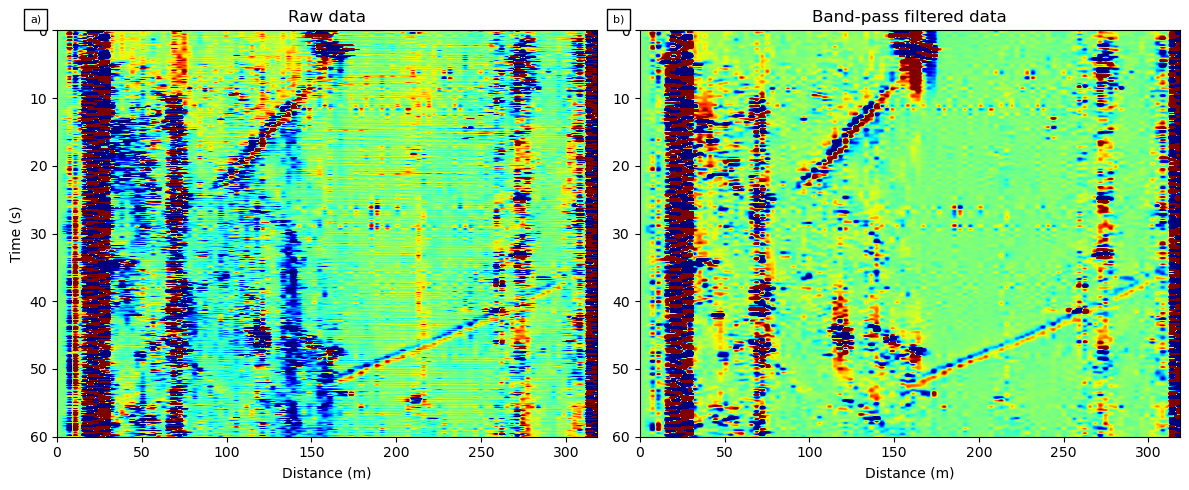

In [89]:
import string
letter_params = {
    "fontsize": 8,
    "verticalalignment": "top",
    "horizontalalignment": "left",
    "bbox": {"edgecolor": "k", "linewidth": 1, "facecolor": "w",}
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.imshow(aa, aspect='auto', cmap='jet', vmin=-0.01, vmax=0.01, extent=[0, ng*dx, nt*dt, 0])
ax2.imshow(bp_data, aspect='auto', cmap='jet', vmin=-0.01, vmax=0.01, extent=[0, ng*dx, nt*dt, 0])

ax1.set_xlabel('Distance (m)')
ax1.set_ylabel('Time (s)')
ax2.set_xlabel('Distance (m)')

ax1.text(-0.05, 1.04, string.ascii_lowercase[0]+')', transform=ax1.transAxes, **letter_params)
ax2.text(-0.05, 1.04, string.ascii_lowercase[1]+')', transform=ax2.transAxes, **letter_params)
ax1.set_title('Raw data')
ax2.set_title('Band-pass filtered data')

fig.tight_layout()


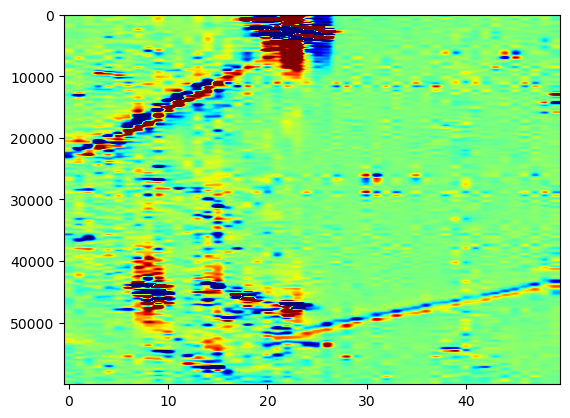

In [28]:
plt.imshow(bp_data, aspect='auto', cmap='jet', vmin=-0.01, vmax=0.01)

## Normalize

In [29]:
norm_data = norm_trace(bp_data)

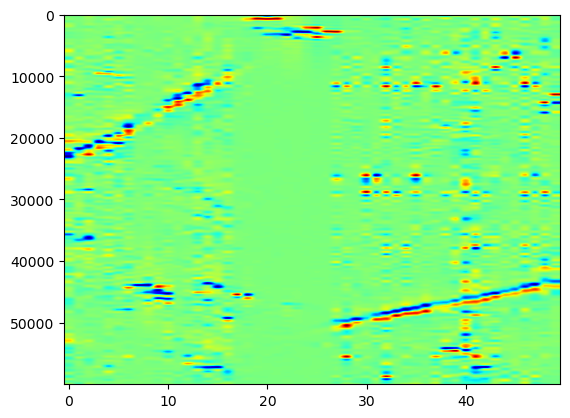

In [30]:
plt.imshow(norm_data, aspect='auto', cmap='jet')

## Radon

In [31]:
vmin = -15
vmax = 15
dv = 0.1
fmin = 0.01
fmax = 1
df = 0.01

ml = Radon(norm_data, dx, dt, vmin, vmax, dv, fmin, fmax, df)

Text(0, 0.5, 'Velocity (km/h)')

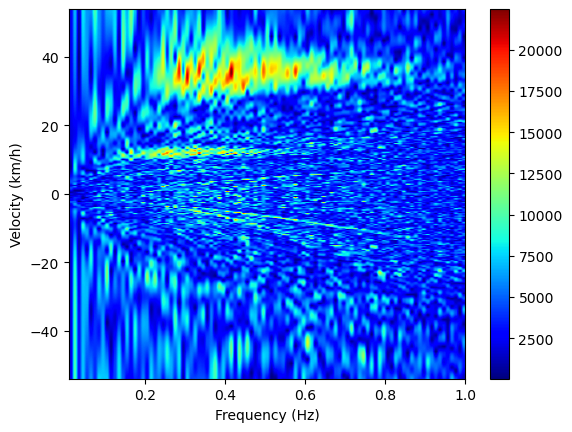

In [32]:
plt.figure()
plt.imshow(ml, aspect='auto', extent=[fmin, fmax, vmin * 3.6, vmax * 3.6], cmap='jet')
plt.colorbar()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Velocity (km/h)')

-34.920000000000066


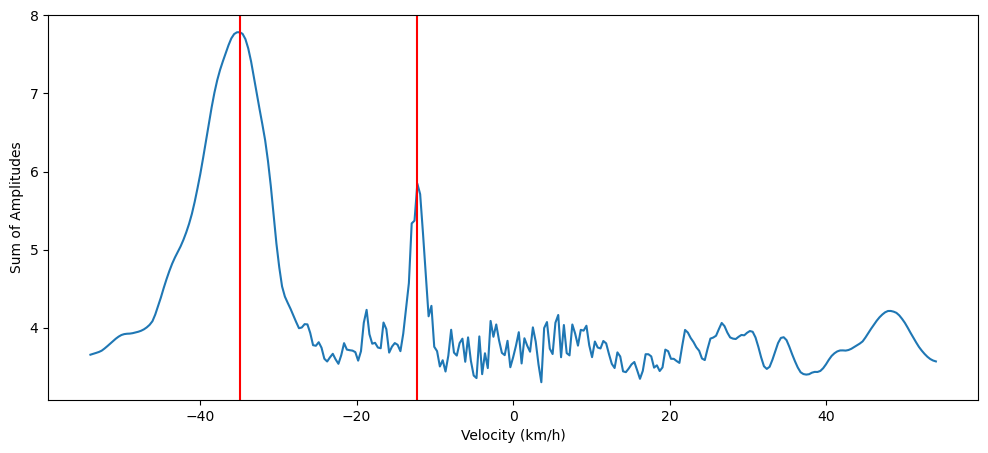

In [49]:
mn = np.sum(ml, axis=1)
mn = mn / mn.std()
inxm = np.argmax(mn)
vv = (np.arange(vmin, vmax + dv, dv)) * 3.6
print(vv[inxm])

peaks = scipy.signal.find_peaks(mn, height=5, distance=20, width=5)


plt.figure(figsize=(12, 5))
plt.plot(vv, mn)
for peak in peaks[0]:
    plt.axvline(vv[peak], color='r')

plt.xlabel('Velocity (km/h)')
plt.ylabel('Sum of Amplitudes')
plt.show()

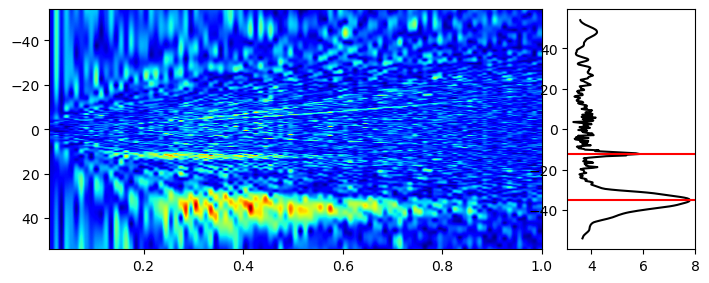

<Figure size 800x600 with 0 Axes>

In [74]:
left,width=0.14,0.77

left_h=width+left+0.04
width_h=0.2

bottom,height=0.11,0.5
bottom_h=bottom+height+0.04


rect_line1=[left,bottom,width,height]
rect_line2=[left_h,bottom,width_h,height]


axbelow=plt.axes(rect_line1)
axupper=plt.axes(rect_line2)

fig = plt.figure(figsize=(8, 6))
ax1 = axupper.plot(mn, vv, color='k')

for peak in peaks[0]:
    axupper.axhline(vv[peak], color='r')

ax2 = axbelow.imshow(ml[::-1], aspect='auto', extent=[fmin, fmax, vmax * 3.6, vmin * 3.6], cmap='jet')

In [39]:
peaks

(array([ 53, 166, 284]),
 {'peak_heights': array([7.78378383, 4.16433402, 4.21571123])})